# Naive Bayes Classifier

### Main Question

> **Which of the previous customers will buy a brand new car?**

Once we predict that a customer wants to buy a brand new car, the advertisement team will post ads of this brand new car on social media and these ads will  
be targeted to customers where we predict they are going to buy the brand new car! 

### Data Understanding

**1.0. What is the domain area of the dataset?**  
The dataset *social_network_ads.csv* contains information collected by a car sale company!  

**2.0. Which data format?**  
The dataset is in *csv* format!  

**2.1. Do the files have headers or another file describing the data?**  
The files does have headers that describes the data! Each column has a name that describes the data it contains!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas!  
Example: 
*User ID,Gender,Age,EstimatedSalary,Purchased*
*15624510,Male,19,19000,0*

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 5 features or columns!
* 400 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
Yes it contains 3 numerical features!  

**5.0. Does it contain categorical features?  How many?**  
Yes it contains 1 categorical features!  

In [2]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
dataset = pd.read_csv("../Datasets/Social_Network_Ads.csv")

In [4]:
RANDOM_STATE = 42

### Basic Exploratory Data Analysis

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 5 and the number of observations/rows in the dataset is 400


### Handling Missing Values

In [8]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Model Building
#### Data Preprocessing

In [10]:
X = dataset.iloc[:, 2:4]
y = dataset.iloc[:, -1]

X.shape, y.shape

((400, 2), (400,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [12]:
print(X_train)

     Age  EstimatedSalary
3     27            57000
18    46            28000
202   39           134000
250   44            39000
274   57            26000
..   ...              ...
71    24            27000
106   26            35000
270   43           133000
348   39            77000
102   32            86000

[320 rows x 2 columns]


### Feature Scaling Needed

X- variables have different range, the one with a large range can influence more the model! 

> The goal is to ensure that all features have a similar scale so that no particular feature dominates others when a model is being trained!  

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Checking for class imbalance in the target class!

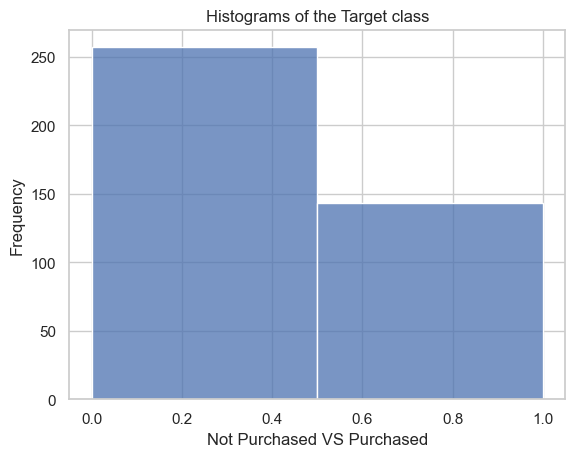

In [14]:
sns.set_theme(style='whitegrid')
fix, ax = plt.subplots()
sns.histplot(dataset['Purchased'], bins=2, ax=ax)
ax.set_title("Histograms of the Target class")
ax.set_xlabel("Not Purchased VS Purchased")
ax.set_ylabel("Frequency")
plt.show()

* NotPurchased has approximately 260 instances!  
* Purchased has approximately 140 instances!  
> There is an imbalance here, as othe *NotPurchased* class is nearly twice as frequent as the *Purchased* class!

## Training the SVM model on the Training Set

In [15]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [16]:
y_pred = naive_bayes.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
209       0          1
280       1          1
33        0          0
210       1          1
93        0          0
..      ...        ...
246       0          0
227       1          1
369       1          1
176       0          0
289       1          0

[80 rows x 2 columns]


In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 3 25]]
